GSAPP PLA6113
<br>
Wednesday January 27th, 2021
<br>
Erik Strand

# Exploring Urban Data with ML
# Supervised Learning 1 - Regression Models



#### Contents

* Supervised learning and regression
    * ML framework
    * Model evaluation methods
* Simple linear regression 
    * Ordinary Least Square regression
    * Multicollinearity
    * Bias-variance tradeoff issue
* Regularization to avoid overfitting
    * Ridge regression
    * Lasso regression

# 1. Supervised learning and regression

* __Supervised learning__: the machine learning task of learning a function that maps an input to an output based on example __input-output pairs__
* Output = Labeled target variable
* __Prediction__ or __classification__ tasks


* Regression: modeling the relationship between a certain number of features and a continuous target variable
* For __prediction tasks__


* Example: Predicting housing prices based on related features
    * Input (X): related features including #of bedrooms, built year, neighborhood, distance to public transportation etc.
    * Output (Y): labeled target variable = housing prices


## 1) ML framework

* Label - The variable that we are trying to predict
* Features - Input variables that are used to produce predictions
* Algorithms - a finite sequence of well-defined, computer-implementable instructions, typically to solve a class of problems or to perform a computation
* Models - Products derived from algorithmic process based on the relationship between the features and the label

Example: Predicting apartment prices based on the number of bedrooms 
* Label - Apartment price
* Feature - #of bedrooms
* Algorithm - Ordinary least square regression
* Model - Product for the prediction with new data point

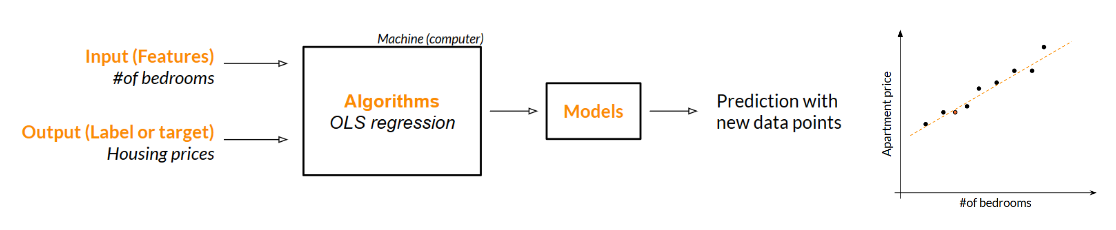

## 2) Model evaluation

* Find the best fit with the smallest error
* Compare predicted value vs. actal label
    
\begin{align}
\ Error_i & = \ Y_i - \hat{Y}_i \\
\end{align}


![image.png](attachment:image.png)

* Mean Squared Error (MSE) - Measures the average of the squares of the errors

\begin{align}
\ MSE = \frac{1}{N}  \sum_{i=1}^n (\ Y_i - \hat{Y}_i)^2
\end{align}

* Root Mean Squared Error (RMSE)
\begin{align}
\ RMSE = \sqrt{MSE}
\end{align}
<br>
* R-Squared value <br>
A statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. So, if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

# 2. Simple linear regression

## 1) Ordinary Least Squares regression

* The most common method for fitting a regression line
* Allows to calculate the best-fitting line over the observed data
* The criteria is to minimize the sum of the squared errors, and since the deviations are first squared, there are no cancellations between positive and negative errors.

\begin{align}
\ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n
\end{align}

where, $y$ is dependent variable (target), $\beta_0$ is the constant, $\beta_1$ is the first regression coefficient, and $x_1$ is the value of the first predictor.

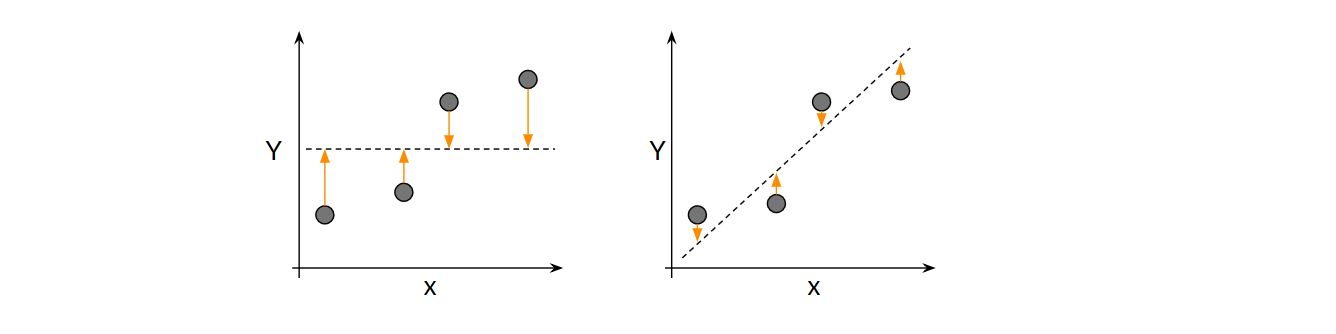

* __Regression coefficient__: the change in the value of dependent variable corresponding to the unit change in the independent variable.

\begin{align}
\ \beta_1 = \frac{\sum_{i=1}^n (\ y_i - \bar{y}_i)(\ x_i - \bar{x}_i)}{\sum_{i=1}^n(\ x_i - \bar{x}_i)^2}  = \frac{Cor(x,y}{Var(x)}
\end{align}

### Univariate linear regression
This method uses a single independent variable to predict a dependent variable by fitting a best linear relationship.

### Multivariate linear regression
This method uses more than one independent variable to predict a dependent variable by fitting a best linear relationship.

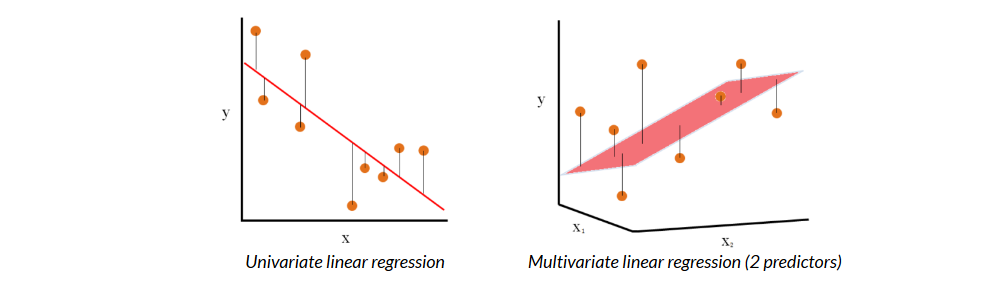

## 2) Multicollinearity
Where two or more independent variables in a multiple regression model are highly linearly related. This often reduces the power of a model to identify independent variables that are statistically significant.

Example: <br>
Predicting housing prices using neighborhood income, neighborhood years of education, degrees

Solutions:
* Feature selection
    * Correlation test
    * VIF (Variance Inflation Factor (a measure of colinearity among predictor variables within a multiple regression)
* Dimensionality reduction (PCA - we will cover this in two weeks)
* Regularized methods (Ridge and Lasso regression models)

## ---------------- Python Example - Ordinary Least Squared (OLS) regression model ----------------

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from regressors import stats
import matplotlib.pyplot as plt
%matplotlib inline

__About data__<br>
Sklearn provides example datasets for exercise purposes. For more information, please check https://scikit-learn.org/stable/datasets/index.html <br>

__Boston Housing dataset__ (506 samples and 13 derived features)


* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town
* CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per USD10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - percentage lower status of the population
* MEDV - Median value of owner-occupied homes in USD1000’s (*Our target variable*)



#### Load Boston housing dataset from sklearn

In [39]:
from sklearn.datasets import load_boston 

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

print (df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Fistly, split data into 1) target variable (y) and 2) predictors (X)
* target variable - y - dependent variable - label
* predictors - X - idependent variables - explanatory variables

In [40]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]

#### Second, train data and test data are splitted using
    train_test_split()
    
Basic concept of ML is developing ML model to apply to new data points (e.g. future scenario), but usually it's hard to collect enough new data points. For this reason, training data and test data are created for 1) buidling ML model through traning and 2) testing the derived model to test data.

* Training set: The sample of data used to fit the model, the actual dataset that we use to train the model
* Test set: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset (test process as future prediction scenario, what if we have new data points?)
* Defualt ratio = 0.75:0.25 (can be specified)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=0)
print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

Train sample (X): 379
Train sample (y): 379
Test sample (X): 127
Test sample (y): 127


#### Building a linear regression model (OLS)
This process is based on the training set, called as training or machine learning process. 

    YOUR_MODEL_NAME = LinearRegression().fit(X_train, y_train)
    
More information: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [42]:
lr = LinearRegression().fit(X_train, y_train)

#### Predict values using OLS model developed above, based on train set and compare actual y values and predicted y values
    predicted y value = YOUR_MODEL_NAME.predict(X_train)
#### Model performance evaluation
    MSE = YOUR_MODEL_NAME.mean_squared_error(y_train, y_pred_train)
    R2 = YOUR_MODEL_NAME.score(X_train, y_train)

In [43]:
y_pred_train = lr.predict(X_train)
print ("Training set score: %.2f"% lr.score(X_train, y_train))
print('Mean squared error (training set): %.2f'% mean_squared_error(y_train, y_pred_train))

Training set score: 0.77
Mean squared error (training set): 19.64


#### Test to the test dataset: final evaluation of the training model
    - If the result from the test dataset is reasonable, our traning model can be used to test data
    - Predicting new data points (future data)

In [44]:
y_pred_test = lr.predict(X_test)
print ("Test set score: %.2f"% lr.score(X_test, y_test))
print('Mean squared error (test set): %.2f'% mean_squared_error(y_test, y_pred_test))

Test set score: 0.64
Mean squared error (test set): 29.78


### Conclution: This OLS model is not perfect, but reasonable to predict housing prices based on predictors. It can be used for the future prediction in Boston.

#### Regression results: coefficients

The change in the value of dependent variable corresponding to the unit change in the independent variable.

    coefficients of predictors = YOUR_MODEL_NAME.coef_
    constant = YOUR_MODEL_NAME.intercept_
    p-values of predictors and intercept = stats.coef_pval(YOUR_MODEL_NAME, X_train, y_train)
    Summary table = stats.summary(YOUR_MODEL_NAME, X_train, y_train, list of predictors)    

In [47]:
print ("List of predictors:", df.columns.tolist()[:-1])
print ("List of regression coefficients:", lr.coef_)
print ("p-values of predictors:", stats.coef_pval(lr, X_train, y_train))
print ("Constant (intercept):",lr.intercept_)

result_ols = pd.DataFrame(columns=['Features', 'Coef', 'p-value'])
result_ols['Features'] = df.columns.tolist()[:-1]
result_ols['Coef'] = lr.coef_
result_ols['p-value'] = stats.coef_pval(lr, X_train, y_train)[1:]
result_ols.round(3)

List of predictors: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
List of regression coefficients: [-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
p-values of predictors: [2.91824342e-11 9.53777668e-04 1.33756447e-04 9.23169270e-01
 1.15790661e-02 1.21849015e-04 0.00000000e+00 5.04066352e-01
 4.47819559e-12 3.36824927e-04 0.00000000e+00 0.00000000e+00
 2.05331308e-11 0.00000000e+00]
Constant (intercept): 36.933255457118975


,Features,Coef,p-value
0,CRIM,-0.118,0.001
1,ZN,0.044,0.000
2,INDUS,-0.006,0.923
3,CHAS,2.393,0.012
4,NOX,-15.589,0.000
5,RM,3.769,0.000
6,AGE,-0.007,0.504
7,DIS,-1.435,0.000
8,RAD,0.240,0.000
9,TAX,-0.011,0.000


In [11]:
xlabels = df.columns.tolist()[:-1]
stats.summary(lr, X_train, y_train, xlabels)

Residuals:
     Min      1Q  Median      3Q      Max
-27.5947 -1.6452  0.5545  2.4579  14.1787


Coefficients:
             Estimate  Std. Error  t value   p value
_intercept  36.933255    5.387961   6.8548  0.000000
CRIM        -0.117735    0.035356  -3.3300  0.000954
ZN           0.044017    0.011406   3.8592  0.000134
INDUS       -0.005768    0.059769  -0.0965  0.923169
CHAS         2.393416    0.943371   2.5371  0.011579
NOX        -15.589421    4.014983  -3.8828  0.000122
RM           3.768968    0.298105  12.6431  0.000000
AGE         -0.007035    0.010520  -0.6687  0.504066
DIS         -1.434956    0.200655  -7.1514  0.000000
RAD          0.240081    0.066352   3.6183  0.000337
TAX         -0.011297    0.001142  -9.8892  0.000000
PTRATIO     -0.985547    0.098734  -9.9818  0.000000
B            0.008444    0.001222   6.9111  0.000000
LSTAT       -0.499117    0.046737 -10.6793  0.000000
---
R-squared:  0.76977,    Adjusted R-squared:  0.76157
F-statistic: 93.87 on 13 features


#### Interpretation
* 'INDUS' and 'AGE' are not statistically significant (what if modeling without those two variables?)
* One unit increase in 'CRIM' (per capita crime rate by town), the target variable (Median value of owner-occupied homes in USD1000) decrease -0.119.
* One unit increase in 'CHAS', meaning if the housing is nearby Charles River, the target variable (home value) increase 2.34.
* You can make your own interpretations for the other predictors.

### Do more complex models with more predictors perform better?
__Let's use more features to predict housing prices in Boston__
* 506 samples, 104 predictors (artificial data)

In [13]:
df = pd.read_csv('../data/boston_data_extended.csv')
print (df.shape)
df.head(2)

(506, 105)


,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.059749,0.208015,0.018655,0.082503,0.287234,0.025759,1.0,0.08968,0.008042,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.0,0.20447,0.041808,21.6


#### Try the same OLS process

In [14]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print ("Training set score: %.2f"% lr.score(X_train, y_train))
print ("Test set score: %.2f"% lr.score(X_test, y_test))
print('Mean squared error (train set): %.2f'% mean_squared_error(y_train, y_pred_train))
print('Mean squared error (test set): %.2f'% mean_squared_error(y_test, y_pred_test))

Training set score: 0.95
Test set score: 0.61
Mean squared error (train set): 4.09
Mean squared error (test set): 32.07


Big difference between R-squared values of training set (0.95) and test set (0.61)!

## 3) Bias-variance tradeoff issue

__Recap of extended OLS results__

|  Evaluation criteria| Training set|Test set |
|-----|-------------|---------|
|   R-squared value       | 0.95        | 0.61    |
| Mean sqaured error (MSE) | 4.09 | 32.07 |

* Usually, a model performance of test data is slightly worse than a performance of training set.
* This is because model is trained based on the training set, meaning if the same data point as the training set comes into the model, the model will perfectly predict label. 
* However, the model can not perform perfectly on the new data points, which is test data.
* If there is a reasonable small gap between model performances of traning set and test set, your model is properly-fitting.
* if there is a quite big gap (like 0.95 and 0.61), it's an over-fitting issue.
* If our model does much better on the training set than on the test set, then we’re likely overfitting.
    * For example, it would be a big red flag if our model saw 99% accuracy on the training set but only 55% accuracy on the test set.

__Over-fitting__ <br>
The model may be able to represent their training set well reflecting all noisy or unrepresentative training data, but it cannot be applied well to test data or new data points.

__Occam's Razor__

    "Simpler solutions are more likely to be correct than complex ones. When presented with competing hypotheses to solve a problem, one should select the solution with the fewest assumptions.'

The less complex an ML model, the more likely that a good empirical result is not just due to the peculiarities of the sample.

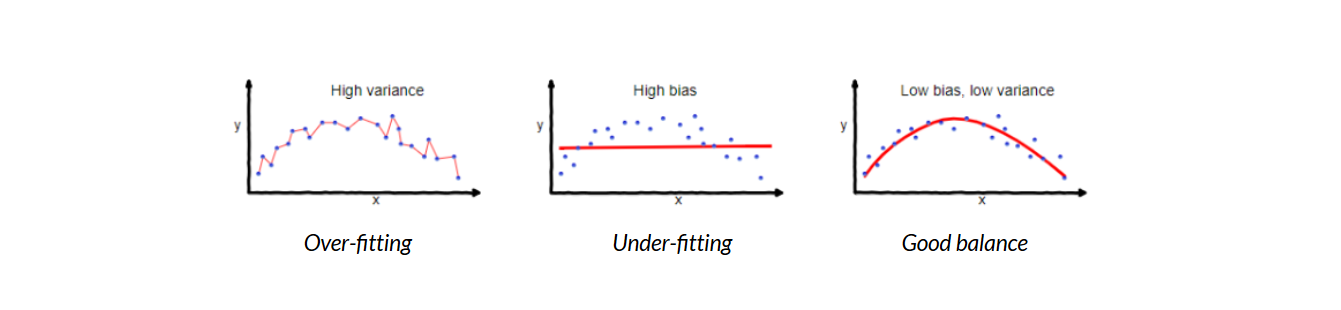

__Bias__

Error due to bias is the amount by which the expected model prediction differs from the true value of the training data. It is introduced by approximating the complicated model by __much simpler model__. High bias algorithms are easier to learn but less flexible, due to this they have lower predictive performance on complex problems. Linear algorithms and __oversimplified__ model lead to high bias in the model. 

__Variance__

Error due to variance is the amount by which the prediction, over one training set, differs from the expected value over all the training sets. In machine learning, diﬀerent training data sets will result in a diﬀerent estimation. But ideally it should not vary too much between training sets. However, if a method has high variance then small changes in the training data can result in large changes in results. 

__Bias-variance tradeoff__
* The bias-variance tradeoff is a central problem in supervised learning.
* Ideally, one wants to choose a model that __both accurately captures the regularities in its training data, but also generalizes well to unseen data.__
* Unfortunately, it is typically impossible to do both simultaneously.
* High-variance learning methods may be able to represent their training set well, but are at risk of overfitting to noisy or unrepresentative training data.
* In contrast, algorithms with high bias typically produce simpler models that don't tend to overfit, but may underfit their training data, failing to capture important regularities.

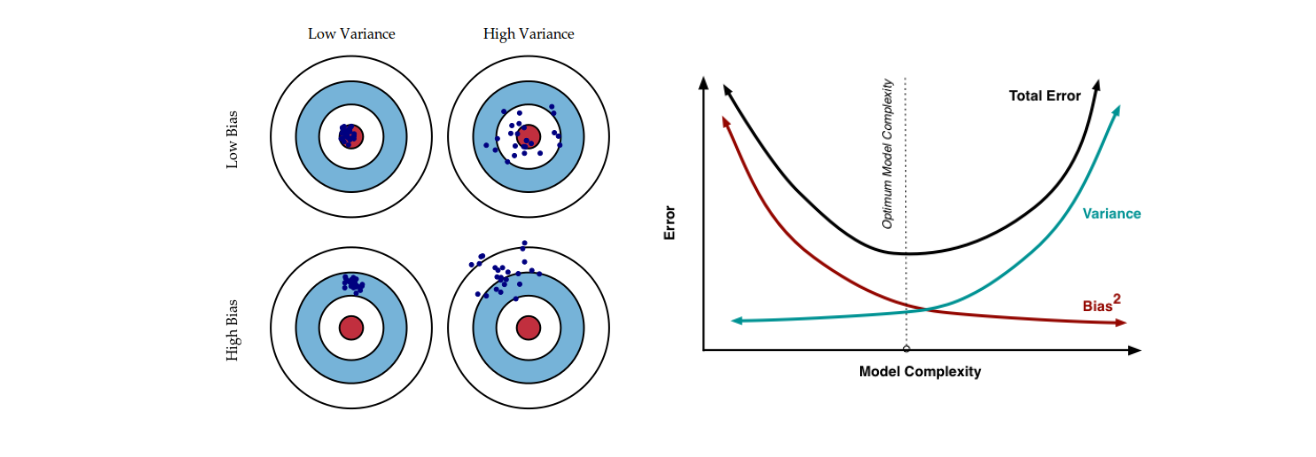

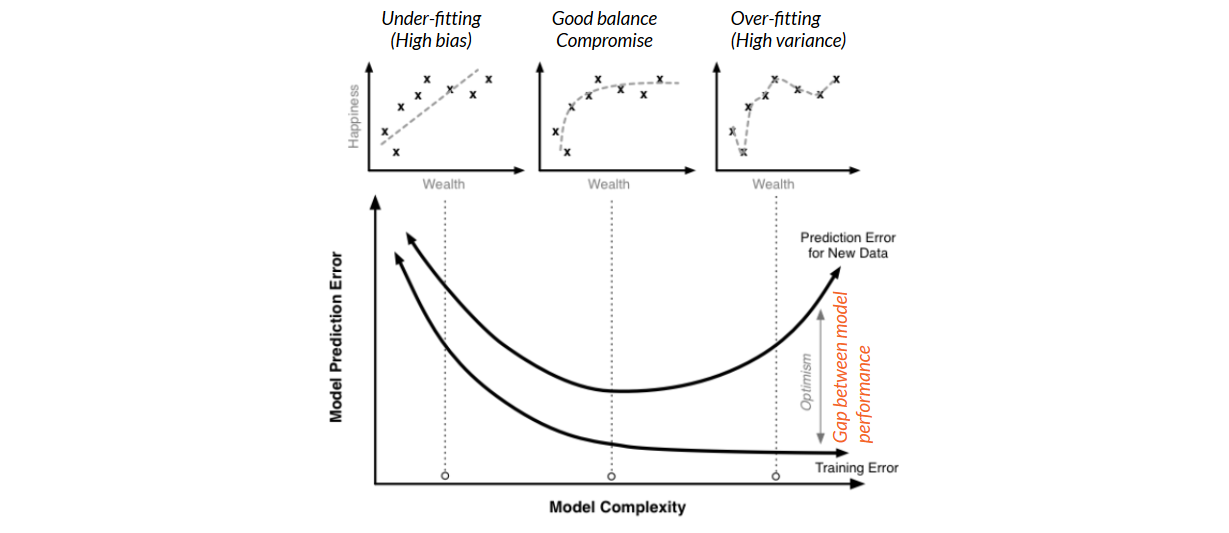

__Reasons of over-fitting__<br>
Overfitting occurs when our model tries to memorize the training data as opposed to try to generalize from patterns observed in the training data.
* Not enough training data
* Too complex model
* Too many features (predictors)
* Multicollinearity

__How to prevent over-fitting__<br>
* Cross-validation***<br>
Use your initial training data to generate multiple mini train-test splits. Use these splits to tune your model. In standard k-fold cross-validation, we partition the data into k subsets, called folds. Then, we iteratively train the algorithm on k-1 folds while using the remaining fold as the test set (called the “holdout fold”). Cross-validation allows you to tune hyperparameters with only your original training set. This allows you to keep your test set as a truly unseen dataset for selecting your final model.

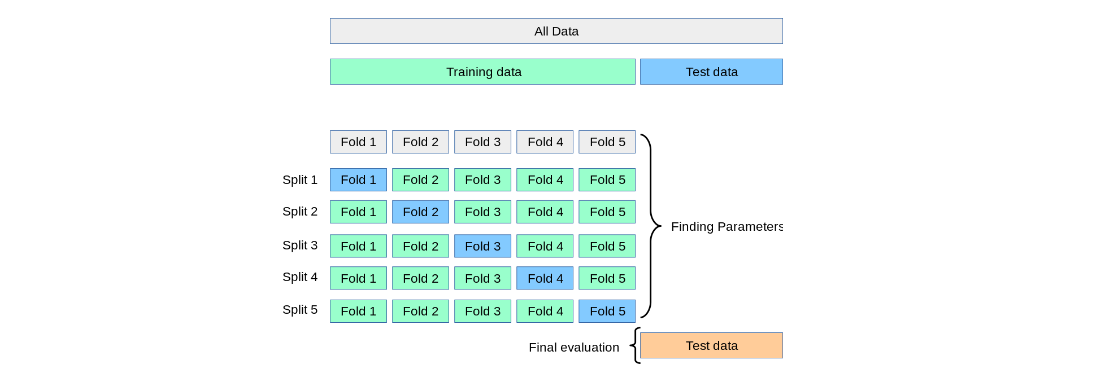

* Train with more data - collect more data points


* Remove features - simplify your model through...
    * Correlation test
    * Empirical investigation
    * Dimensionality reduction and creating integrated feature (*social well-being = f(income, insurance, education etc.)*)
    
    
* Regularization***<br>
Regularization refers to a broad range of techniques for __artificially forcing your model to be simpler__. You add a penalty parameter to the cost function in regression. (Ridge regression and Lasso regression)
    
    
* Ensembling (we will learn this method after midterm)<br>
Ensembles are machine learning methods for combining predictions from multiple separate models.

# 3. Regularization models to avoid overfitting


__Starting from the limitation of OLS model...__<br>
Linear regression finds the coefficient values that maximize R²/minimize MSE. But this may not be the best model, and will give a coefficient for each predictor provided. This includes terms with little predictive power. This results in a high-variance, low bias model. We therefore have the potential to improve our model by trading some of that variance with bias to reduce our overall error. This trade comes in the form of regularization, in which __we modify our cost function to restrict the values of our coefficients__. This allows us to trade our excessive variance for some bias, potentially reducing our overall error.

* The ordinary least squares (OLS) estimates minimize the following objective function: 
\begin{align}
\underset{\beta\in R^k}{\operatorname{min}} \{\frac{1}{N} ||y-X\beta||^2_2\}
\end{align}

Regularization refers to a broad range of techniques for __artificially forcing your model to be simpler__. You add a penalty parameter to the cost function in regression

## 1) Ridge regression

* Also a linear model for regression like OLS
* The coefficients are chosen not only so that they predict well on the training data, but also to fit an additional constraint
* Also want to the magnitude of coefficients to be as small as possible; in other words, all entries of the coefficients should be close to 0 (zero)
* Intuitively, this means each feature should have a little effect on the outcome as possible, while still predicting well
* L2 Regularization - panalize using sums the squares of coefficient values (the L2 norm, mathematicaly) and multiplies it by some constant $\lambda$

\begin{align}
\underset{\beta\in R^k}{\operatorname{min}} \{\frac{1}{N} ||y-X\beta||^2_2 + \lambda||\beta||^2_2 \}
\end{align}

* This regularization term will decrease the values of coefficients, but is unable to force a coefficient to exactly 0
* We can vary lambda to get models with different levels of regularization with lambda=0 corresponding to OLS and lambda approaching infinity corresponding to a constant function

## ----------------------------- Python Example - Ridge regression model ------------------------------

#### Import a module for ridge regression

In [15]:
from sklearn.linear_model import Ridge

#### Building ridge regression model using the extended Boston housing data

Reference point is the result of OLS:
    
    OLS R-squared (train) = 0.95
    OLS R-squared (test) = 0.61
    

This process is based on the training set, called as training or machine learning process.

    YOUR_MODEL_NAME = Ridge().fit(X_train, y_train)

More information: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [16]:
ridge = Ridge().fit(X_train, y_train)
print ("Training set score: %.3f"% ridge.score(X_train, y_train))
print ("Test set score: %.3f"% ridge.score(X_test, y_test))

print('Mean squared error (training set): %.2f'% mean_squared_error(y_train, ridge.predict(X_train)))
print('Mean squared error (test set): %.2f'% mean_squared_error(y_test, ridge.predict(X_test)))

Training set score: 0.886
Test set score: 0.753
Mean squared error (training set): 9.74
Mean squared error (test set): 20.20


We just used the defualt parameter alpha=0.1. There is no reason why this will give us the best trade-off. The optimum setting of alpha depends on the particular dataset we are using. Increasin galpha forces coefficients to move more toward 0 (zero), whicn decrease training set performance but might help generalization.

#### alpha = 10

In [17]:
ridge = Ridge(alpha=10).fit(X_train, y_train)
print ("Training set score: %.3f"% ridge.score(X_train, y_train))
print ("Test set score: %.3f"% ridge.score(X_test, y_test))

print('Mean squared error (training set): %.2f'% mean_squared_error(y_train, ridge.predict(X_train)))
print('Mean squared error (test set): %.2f'% mean_squared_error(y_test, ridge.predict(X_test)))

Training set score: 0.788
Test set score: 0.636
Mean squared error (training set): 18.06
Mean squared error (test set): 29.74


Decreasing alpha allows the coefficients to be less restricted. For very samll values of alpha, coefficients are barely restricted at all. (resmbles OLS)
#### alpha=0.1

In [18]:
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print ("Training set score: %.3f"% ridge.score(X_train, y_train))
print ("Test set score: %.3f"% ridge.score(X_test, y_test))

print('Mean squared error (training set): %.2f'% mean_squared_error(y_train, ridge.predict(X_train)))
print('Mean squared error (test set): %.2f'% mean_squared_error(y_test, ridge.predict(X_test)))

Training set score: 0.928
Test set score: 0.772
Mean squared error (training set): 6.12
Mean squared error (test set): 18.61


#### Criteria of finding the optimized parameter
* Good performance on the training set
* Good performance on the test set 
* Smallest gap between two values - meaning properly fitting, good compromise

In [19]:
lambdas = np.linspace(0,20,1000)

list_train = [] 
list_test = []
list_gap = [] 

for alpha in lambdas:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train) 
    
    list_train.append(ridge.score(X_train, y_train))
    list_test.append(ridge.score(X_test, y_test))
    list_gap.append(ridge.score(X_train, y_train) - ridge.score(X_test, y_test))

print ("The list of R2 values (training set):", list_train[:3])
print ("The list of R2 values (test set):", list_test[:3])
print ("The list of gap between two values:", list_gap[:3])

The list of R2 values (training set): [0.9505625868934517, 0.9406662017092067, 0.9360753499874381]
The list of R2 values (test set): [0.5894830609712521, 0.7331376173308468, 0.7562280760996684]
The list of gap between two values: [0.3610795259221996, 0.20752858437835986, 0.17984727388776978]


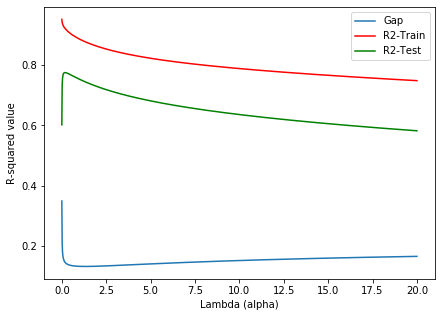

In [17]:
plt.figure(figsize=(7,5))

plt.plot(lambdas, list_gap, label='Gap')
plt.plot(lambdas, list_train, c='Red', label='R2-Train') 
plt.plot(lambdas, list_test, c='Green', label='R2-Test')

plt.xlabel("Lambda (alpha)")
plt.ylabel("R-squared value")

plt.legend()

#### Find the optimized lambda for the best performing model

In [20]:
p = list_gap.index(min(list_gap)) 
print ("Optimized lambda (alpha) =", round(lambdas[p],3))
print ("R-squqared value (train) of the optimized ridge model = ", round(list_train[p],3))
print ("R-squqared value (test) of the optimized ridge model = ", round(list_test[p],3))

Optimized lambda (alpha) = 1.321
R-squqared value (train) of the optimized ridge model =  0.877
R-squqared value (test) of the optimized ridge model =  0.744


#### Final ridge model with $\lambda$ = 1.321

In [21]:
final_ridge = Ridge(alpha=lambdas[p]).fit(X_train, y_train)
y_pred_train = final_ridge.predict(X_train)

print ("Training set score: %.2f"% final_ridge.score(X_train, y_train))
print('Mean squared error (training set): %.2f'% mean_squared_error(y_train, y_pred_train))

y_pred_test = final_ridge.predict(X_test)

print ("Test set score: %.2f"% final_ridge.score(X_test, y_test))
print('Mean squared error (test set): %.2f'% mean_squared_error(y_test, y_pred_test))

Training set score: 0.88
Mean squared error (training set): 10.50
Test set score: 0.74
Mean squared error (test set): 20.90


#### Comparison: OLS vs. Optimized Ridge

|Algorithm|  Evaluation criteria| Training set|Test set |
|-----|-----|-------------|---------|
|OLS|   R-squared value       | 0.95  | 0.61    |
|OLS| Mean sqaured error (MSE) | 4.09 | 32.07 |
|Ridge|   R-squared value       | 0.88  | 0.74    |
|Ridge| Mean sqaured error (MSE) | 10.50 | 20.90 |


#### Regression coefficients of the final model
Decreased the values of coefficients, but is unable to force a coefficient to exactly 0

Again, coefficients indicate how much change in Y occurs for a one-unit change in x when the remaining X’s are held constant. These coefficients are also called partial-regression coefficients since the effect of the other X’s is removed.

In [22]:
print (final_ridge.coef_[:10])

[-1.35103112 -1.14624375 -1.33271107 -0.10021418 -0.24434928  7.67334826
  0.12628017 -4.53241933  3.31550109 -1.2181435 ]


## 2) Lasso regression

* Also a linear model for regression like OLS and Ridge
* An alternative to Ridge for regularizing coefficients to be close to zero, but using L1 regularization - panalize using the sum of the abosolute coefficient values (the L1 norm, mathmatically) multiplied by a constant $\lambda$
* This additional term penalizes the model for having coefficients that do not explain a sufficient amount of variance in the data
* The consequence of L1 regularization is that when using the Lasso, some coefficients are exactly 0 (zero)
* A form of automatic feature selection
    * Makes a model easier to interpret
    * Reveal the most important features of a model


\begin{align}
\underset{\beta\in R^k}{\operatorname{min}} \{\frac{1}{N} ||y-X\beta||^2_2 + \lambda||\beta||_1 \}
\end{align}

* It is important to note that if lambda=0, we effectively have no regularization and we will get the OLS solution. 
* As lambda tends to infinity, the coefficients will tend towards 0 and the model will be just a constant function.

## ----------------------------- Python Example - Lasso regression model ------------------------------

#### Import module for Lasso regression

In [23]:
from sklearn.linear_model import Lasso

#### Building ridge regression model using the extended Boston housing data

This process is based on the training set, called as training or machine learning process.

YOUR_MODEL_NAME = Lasso().fit(X_train, y_train)

More information: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [24]:
lasso = Lasso().fit(X_train, y_train)
print ("Training set score: %.3f"% lasso.score(X_train, y_train))
print ("Test set score: %.3f"% lasso.score(X_test, y_test))
print('Mean squared error (training set): %.2f'% mean_squared_error(y_train, lasso.predict(X_train)))
print('Mean squared error (test set): %.2f'% mean_squared_error(y_test, lasso.predict(X_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0)) 

Training set score: 0.293
Test set score: 0.209
Mean squared error (training set): 60.29
Mean squared error (test set): 64.59
Number of features used: 4


* Performance of the first lasso model is really bad (R2 = 0.29)
* Underfitting issue
* Only 4 of 105 features were used for modeling
* Need to tune alpha, that controls how strongly coefficients are pushed toward 0 (zero)

#### alpha = 0.01
A lower alpha allows to fit a more complex model, which work better on the training and test data.

In [25]:
lasso = Lasso(alpha=0.01).fit(X_train, y_train)
print ("Training set score: %.3f"% lasso.score(X_train, y_train))
print ("Test set score: %.3f"% lasso.score(X_test, y_test))
print('Mean squared error (training set): %.2f'% mean_squared_error(y_train, lasso.predict(X_train)))
print('Mean squared error (test set): %.2f'% mean_squared_error(y_test, lasso.predict(X_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0)) 

Training set score: 0.896
Test set score: 0.768
Mean squared error (training set): 8.86
Mean squared error (test set): 18.97
Number of features used: 32


* Slightly better performance than using Ridge
* Using only 33 of 105 features - Lasso automatically removed unrelevant features (removing multicollinearity issue)
* Eeasier to understand and interpret!


#### Criteria of finding the optimized parameter

* Good performance on the training set
* Good performance on the test set
* Smallest gap between two values - meaning properly fitting, good compromise

In [26]:
lambdas = np.linspace(0,0.25,100)

list_train = [] 
list_test = [] 
list_gap = [] 
list_num_features = []

for alpha in lambdas:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train) 
    
    list_train.append(lasso.score(X_train, y_train))
    list_test.append(lasso.score(X_test, y_test))
    list_gap.append(lasso.score(X_train, y_train) - lasso.score(X_test, y_test))
    list_num_features.append(np.sum(lasso.coef_ != 0))

print ("The list of R2 values (training set):", list_train[:3])
print ("The list of R2 values (test set):", list_test[:3]) 
print ("The list of gap between two values:", list_gap[:3])
print ("The list of #of used features:", list_num_features[:3])

The list of R2 values (training set): [0.9426383219008584, 0.9273571578192076, 0.9159730480286324]
The list of R2 values (test set): [0.6916323869060309, 0.7822079745122655, 0.7869449257661028]
The list of gap between two values: [0.2510059349948275, 0.14514918330694204, 0.1290281222625297]
The list of #of used features: [104, 55, 47]


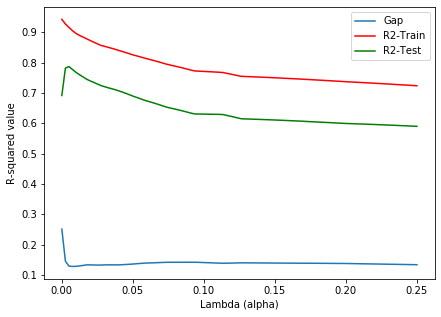

In [27]:
plt.figure(figsize=(7,5))

plt.plot(lambdas, list_gap, label='Gap')
plt.plot(lambdas, list_train, c='Red', label='R2-Train') 
plt.plot(lambdas, list_test, c='Green', label='R2-Test')

plt.xlabel("Lambda (alpha)")
plt.ylabel("R-squared value")

plt.legend()

#### Find the optimized lambda for the best performing model

In [28]:
p = list_gap.index(min(list_gap)) 
print ("Optimized lambda (alpha) =", round(lambdas[p],3))
print ("R-squqared value (train) of the optimized ridge model = ", round(list_train[p],3))
print ("R-squqared value (test) of the optimized ridge model = ", round(list_test[p],3))
print ("The number of features used =", list_num_features[p])

Optimized lambda (alpha) = 0.008
R-squqared value (train) of the optimized ridge model =  0.905
R-squqared value (test) of the optimized ridge model =  0.777
The number of features used = 41


#### Final Lasso model with 𝜆= 0.008

In [29]:
final_lasso = Lasso(alpha=lambdas[p]).fit(X_train, y_train)
y_pred_train = final_lasso.predict(X_train)

print ("Training set score: %.2f"% final_lasso.score(X_train, y_train))
print('Mean squared error (training set): %.2f'% mean_squared_error(y_train, y_pred_train))

y_pred_test = final_lasso.predict(X_test)

print ("Test set score: %.2f"% final_lasso.score(X_test, y_test))
print('Mean squared error (test set): %.2f'% mean_squared_error(y_test, y_pred_test))
print ("The number of features used =",np.sum(final_lasso.coef_ != 0))

Training set score: 0.90
Mean squared error (training set): 8.10
Test set score: 0.78
Mean squared error (test set): 18.22
The number of features used = 41


#### Comparison: OLS vs. Optimized Ridge vs. Optimized Lasso

|Algorithm|  Evaluation criteria| Training set|Test set |
|-----|-----|-------------|---------|
|OLS|   R-squared value       | 0.95  | 0.61    |
|OLS| Mean sqaured error (MSE) | 4.09 | 32.07 |
|Ridge|   R-squared value       | 0.88  | 0.74    |
|Ridge| Mean sqaured error (MSE) | 10.50 | 20.90 |
|Lasso| R-squared value | 0.90 | 0.78 |
|Lasso| Mean squared error (MSE) | 8.10 | 18.22 |

#### Regression coefficients of the final model

In [30]:
print (final_lasso.coef_)

[ -0.          -0.          -0.           0.          -0.
   8.78166611   0.          -7.38430677  14.71644944   0.
   0.           0.          -0.          -0.          -0.
  -0.           0.          -0.          -0.          -0.
  -0.          -9.24416267  -0.          -0.          -0.
  -0.           2.21082764  -0.           0.          -0.
   0.08632243  -1.90739285   0.          -0.          -0.
   0.          -0.          -0.           2.94179881   0.
   0.          -0.           0.          -7.30403368   0.
   6.96374325  -1.61898408  -0.          -4.48334809   0.
  -6.12718639  -5.6680525    3.36729929  -0.           5.59931477
   0.           0.           2.79174575  -0.          -0.18220089
  -4.14677559  -1.09039703  -0.          -4.1911021   -0.
  -1.04866178  -0.          -0.          26.95087413  -2.6449344
   0.         -15.41944316 -11.30185942 -13.27758539  10.62144333
 -10.21829189  -0.          -0.           5.12431966   0.
  -0.          -0.          -9.66103918  

# Conclusion:
1. Supervised learning, prediction, linear regression purposes
2. The bias-variance tradeoff is a tradeoff between a complicated and simple model, in which an intermediate complexity is likely best
3. We can simply start from simple ordinary least squares (ols) linear regression
4. To avaid overfitting and multicollinearity issues, Lasso and Ridge can be used as modifications of ols, which use additional panetly terms 
5. Ridge regression is useful for keeping all features 
6. Lasso regression is useful for feature selection
7. It doesn't mean Ridge or Lasso always perform better than OLS. We need to develop multiple models (parameter tunning as well) to find the best fitted model